Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator

Load and Prepare data

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  
}).rename(columns={'TransactionID': 'NumTransactions'})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary)

In [4]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

knee = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
n_clusters = knee.elbow

c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

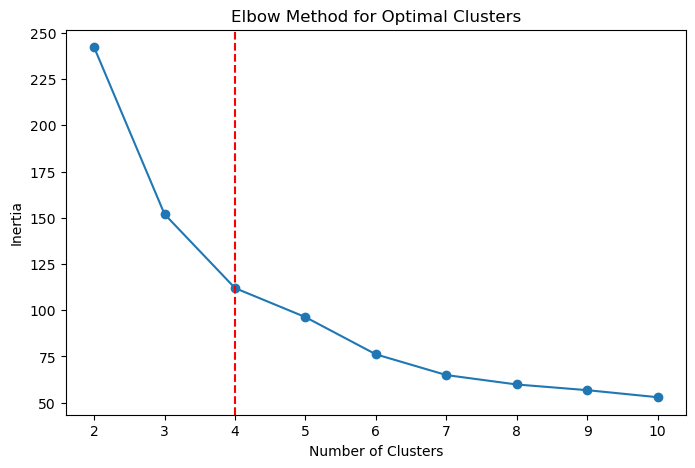

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.axvline(x=n_clusters, color='r', linestyle='--')
plt.show()

In [6]:
clustering = KMeans(n_clusters=n_clusters, random_state=42)
customer_summary['Cluster'] = clustering.fit_predict(scaled_data)

c:\Users\mohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
db_index = davies_bouldin_score(scaled_data, customer_summary['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_summary['Cluster'])
print(f'Number of Clusters: {n_clusters}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Number of Clusters: 4
Davies-Bouldin Index: 0.8650620583623065
Silhouette Score: 0.37356460556541055


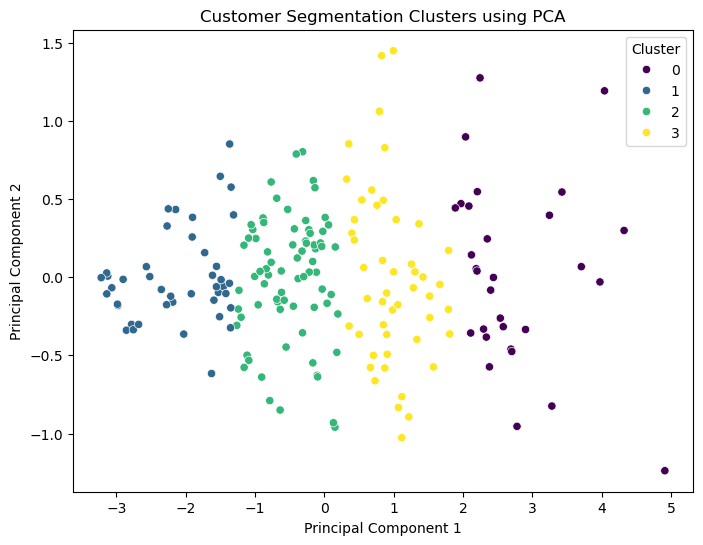

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
customer_summary['PCA1'] = pca_result[:, 0]
customer_summary['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_summary, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation Clusters using PCA')
plt.legend(title='Cluster')
plt.show()

In [9]:
print(customer_summary.head())

            TotalValue  Quantity  NumTransactions  Cluster      PCA1      PCA2
CustomerID                                                                    
C0001          3354.52        12                5        2 -0.113803  0.031514
C0002          1862.74        10                4        2 -1.031298  0.304492
C0003          2725.38        14                4        2 -0.377463 -0.009680
C0004          5354.88        23                8        0  2.350960  0.244789
C0005          2034.24         7                3        1 -1.527930 -0.097473
